In [200]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline

## Rolling the Dice

In [42]:
#defining random number generator


def p_rn(J0,m,a,c):
    I = np.zeros(m)
    I[0] = J0
    for i in range(0,m-1):
        I[i+1] = (a*I[i]+c)%m
    return I

#normalized sequence
def n_rn(J0,m,a,c):
    I = p_rn(J0,m,a,c)
    return I/(m-1)


Text(0.5, 1.0, 'Pairs ($I_n$, $J_n$) with a = 18345, m = 6004 and c = 128')

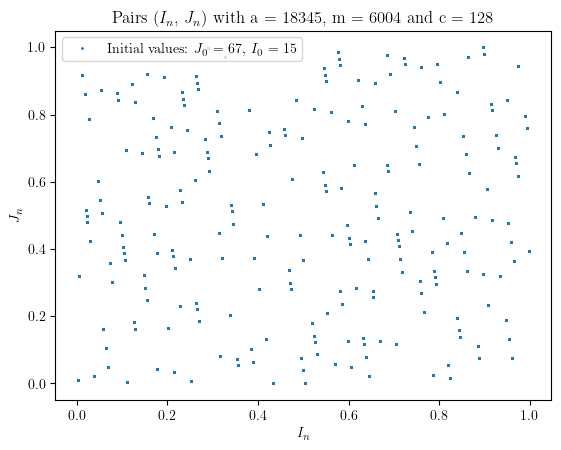

In [201]:
a1 = 18345
m1 = 6004
c1 = 128
I0 = 15
J0 = 67
I = n_rn(I0,m1,a1,c1)
J = n_rn(J0,m1,a1,c1)

plt.plot(I,J, linestyle = 'None', marker = 'o', markersize = 1, 
         label =r'Initial values: $J_0$ = {}, $I_0$ = {}'.format(J0, I0))
plt.xlabel(r'$I_n$')
plt.ylabel(r'$J_n$')
plt.legend()
plt.title('Pairs ($I_n$, $J_n$) with a = {}, m = {} and c = {}'.format(a1,m1,c1))

Text(0, 0.5, '$I_{n+1}$')

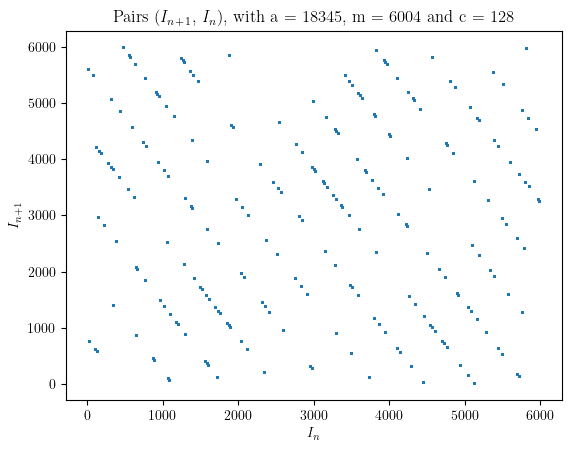

In [202]:
#a1 = 106
#m1 = 6075
a1 = 18345
m1 = 6004
c1 = 128
I0 = 15
I = p_rn(I0,m1,a1,c1)
plt.plot(I[1:],I[:-1], linestyle = 'None', marker = 'o', markersize = 1)
plt.title(r'Pairs ($I_n$$_+$$_1$, $I_n$), with a = {}, m = {} and c = {}'.format(a1,m1,c1))
plt.xlabel(r'$I_n$')
plt.ylabel(r'$I_{n+1}$')

In [105]:
# creating sequence for dice 
def dice(m,a,c):
    d = np.random.rand(1)*100
    I = n_rn(d,m,a,c)*6
    s = 0
    i = 0
    for i in range(0,10):
        if i <10:
            s = s + I[int(np.random.rand(1)*100)]
        else:
            break
    return s 

(array([   5.,   21.,   50.,  118.,  214.,  409.,  610.,  908., 1110.,
        1237., 1281., 1190.,  972.,  725.,  513.,  345.,  166.,   83.,
          30.,   13.]),
 array([10.27203191, 12.1622943 , 14.05255669, 15.94281908, 17.83308147,
        19.72334386, 21.61360625, 23.50386864, 25.39413103, 27.28439342,
        29.17465581, 31.0649182 , 32.95518059, 34.84544298, 36.73570537,
        38.62596776, 40.51623015, 42.40649254, 44.29675493, 46.18701732,
        48.07727971]),
 <BarContainer object of 20 artists>)

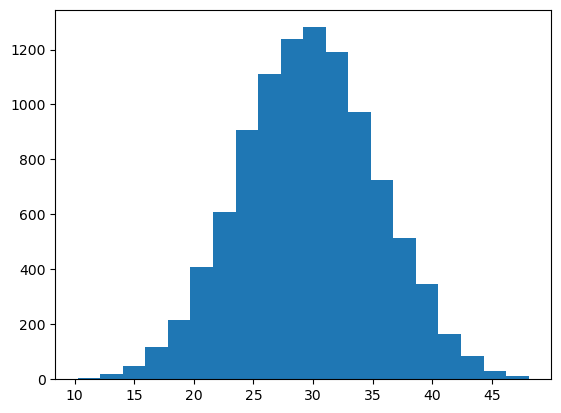

In [109]:
a1 = 106
m1 = 6075
c1 = 128
n = 10000
r_sum = np.zeros(n)
for i in range(0,n):
    r_sum[i] = dice(m1,a1,c1)
n_bins = 20
plt.hist(r_sum, bins = n_bins)

## Probability distribution functions

Given is the probability function:
$$ p(x) = bx.$$
In order to find the proper normalization we integrate the PDF along its domain $[0,a)$. Doing such we get:
$$ 1 \overset{!}{=} \int_{[0,a)} bx\; dx = b\left[\frac{1}{2} x^2\right]_0^a = \frac{b}{2}a^2$$
$$ \Leftrightarrow b = \frac{2}{a^2}$$

Text(0.5, 1.0, 'Histogram of set \\{ $x_i$\\}')

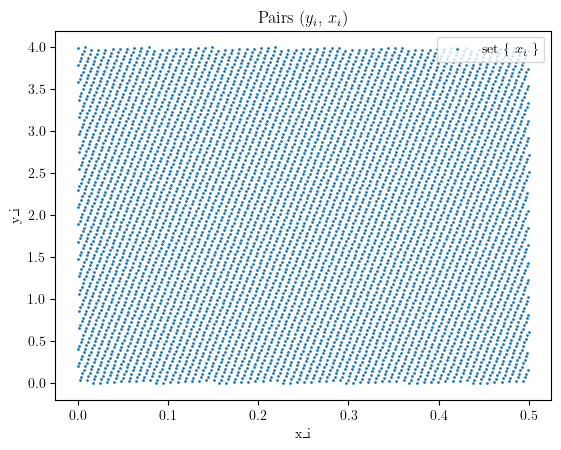

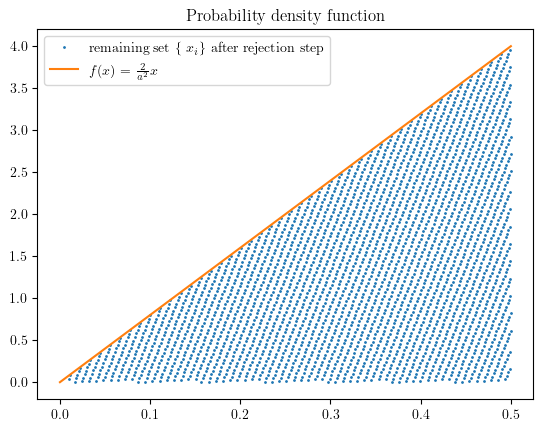

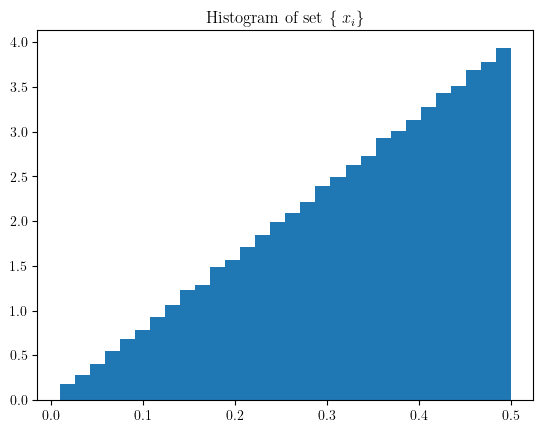

In [249]:
a = 0.5

#parameters for random number generator

a1 = 106
m1 = 6075
c1 = 128
I0 = 15
x_i = n_rn(23,m1,a1,c1)*a
s_i = n_rn(56,m1,a1,c1)

x_n = np.array([])
y_n = np.array([])

for i in range(0,len(s_i)):
    y = 2/a*s_i
    if y[i] <= 2/a**2*x_i[i]:
        x_n = np.append(x_n,x_i[i])
        y_n = np.append(y_n, y[i])
    else:
        pass
    
n_bins = 30

def p_x(x):
    b = 2/a**2
    return b*x
x = np.linspace(0,0.5,100)

y_i = 2/a*s_i
fig1, ax1 = plt.subplots()
ax1.plot(x_i,y_i, linestyle = 'None', marker = 'o', markersize = 1,
        label = r' set \{ $x_i$ \}')
plt.title(r'Pairs ($y_i$, $x_i$)')
plt.xlabel(r'x_i')
plt.ylabel(r'y_i')
plt.legend()

fig2, ax2 = plt.subplots()
ax2.plot(x_n,y_n, linestyle = 'None', marker = 'o', markersize = 1,
        label = r'remaining set \{ $x_i$\} after rejection step')
ax2.plot(x,p_x(x), label = r'$f (x)$ = $\frac{2}{a^2} x$ ')
plt.title(r'Probability density function')
plt.legend()

fig3, ax3 = plt.subplots()
ax3.hist(x_n,density = True, bins = n_bins)
ax3.plot(x,p_x(x), label = r'$f (x)$ = $\frac{2}{a^2} x$ ')
plt.title(r'Histogram of set \{ $x_i$\}')

In [382]:
def p_x(x):
    b = 2/a**2
    return b*x

def r_pdf(n):
    x_i = random.rand(n)*a
    s_i = random.rand(n)

    x_n = np.array([])
    y_n = np.array([])
    for i in range(0,len(s_i)):
        y = 2/a*s_i
        if y[i] <= 2/a**2*x_i[i]:
            x_n = np.append(x_n,x_i[i])
            y_n = np.append(y_n, y[i])
        else:
            pass
     
    fig3, ax3 = plt.subplots()
    ax3.hist(x_n, density = True, bins = n_bins)
    ax3.plot(x,p_x(x), label = r'$f (x)$ = $\frac{2}{a^2} x$ ')
    plt.title(r'Histogram of set \{ $x_i$\}')
    plt.ylabel('Probability density')
    plt.xlabel('Value')
    plt.legend()

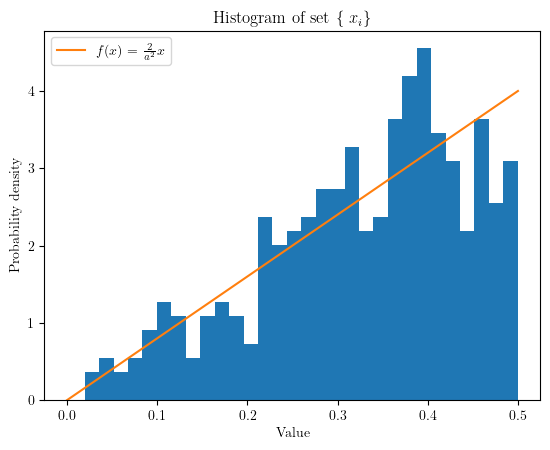

In [383]:
r_pdf(700)

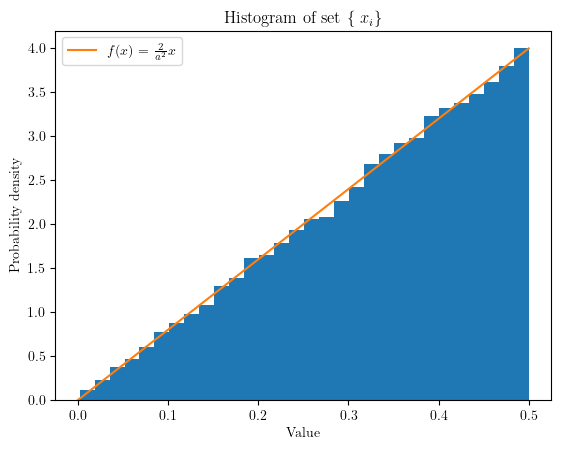

In [384]:
r_pdf(100000)

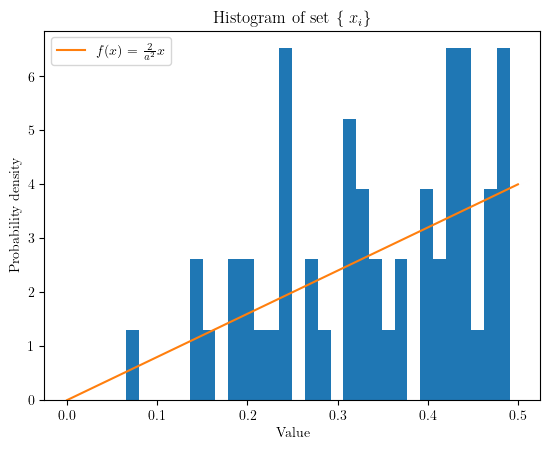

In [385]:
r_pdf(100)

## Finding value of $\pi$

In [390]:
#defining rejection algorithm

def f_x(x):
    return np.sqrt(1-x**2)
def g(x):
    return -0.64*x**2 + 21/20
def pi_pdf(n):
    x_i = random.rand(n)
    s_i = random.rand(n)

    x_n = np.array([])
    y_n = np.array([])
    for i in range(0,len(s_i)):
        if s_i[i] <= f_x(x_i[i]):
            x_n = np.append(x_n,x_i[i])
            y_n = np.append(y_n, s_i[i])
        else:
            pass


    fig3, ax3 = plt.subplots()
    ax3.hist(x_n, density = True, bins = n_bins)
    x = np.linspace(0,1,200)
    ax3.plot(x,f_x(x), label = r'$\sqrt{1 - x^2}$ ')
    plt.title(r'Histogram of set \{ $x_i$\}')
    plt.ylabel('Probability density')
    plt.xlabel('Value')
    
    fig2, ax2 = plt.subplots()
    ax2.plot(x_n,y_n, linestyle = 'None', marker = 'o', markersize = 1,
             label = r'remaining set \{ $x_i$\} after rejection step')
    ax2.plot(x,f_x(x), label = r'$f(x)$ = $\sqrt{1-x^2}$ ')
    plt.title(r'Probability density function')
    plt.legend()
    print(sum(x_n)/4)


31.108699716605532


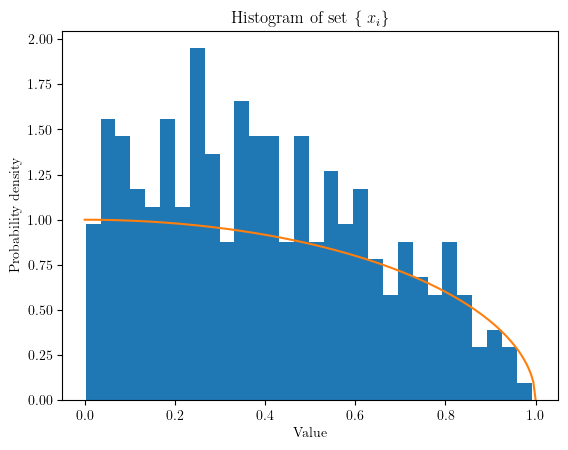

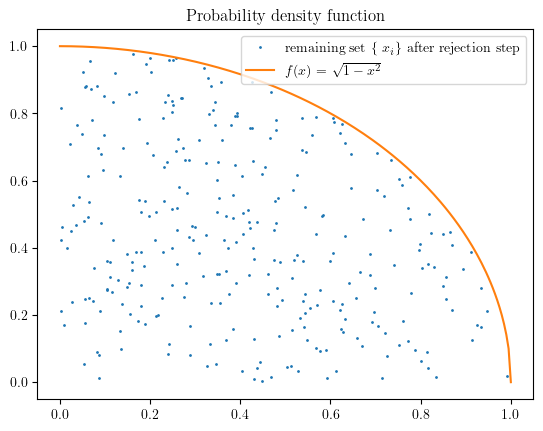

In [391]:
pi_pdf(390)

419.1366269789367


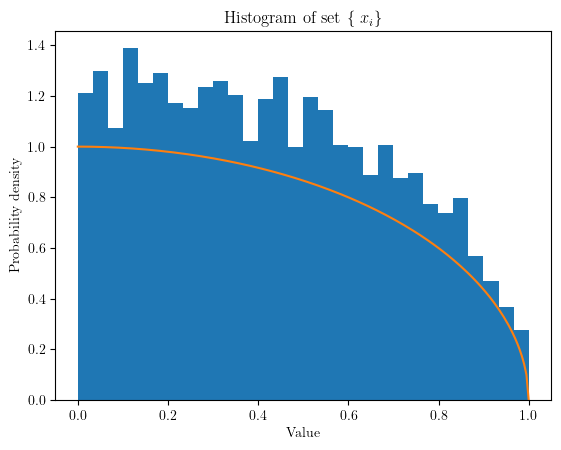

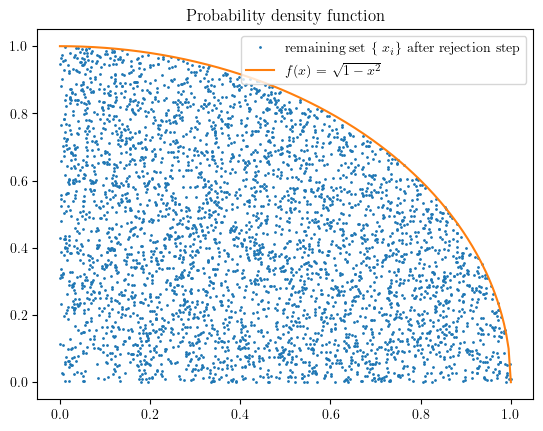

In [392]:
pi_pdf(5000)

4194.4852763457775


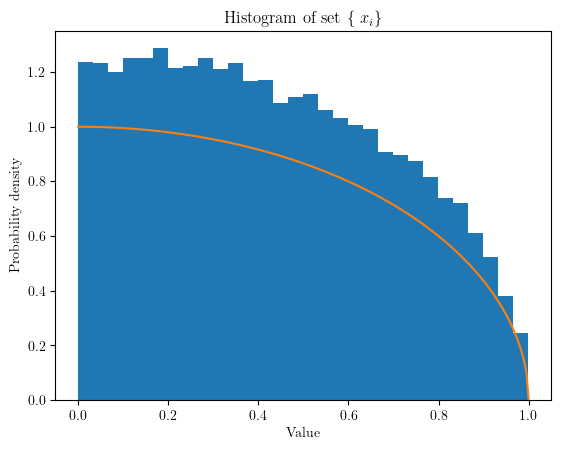

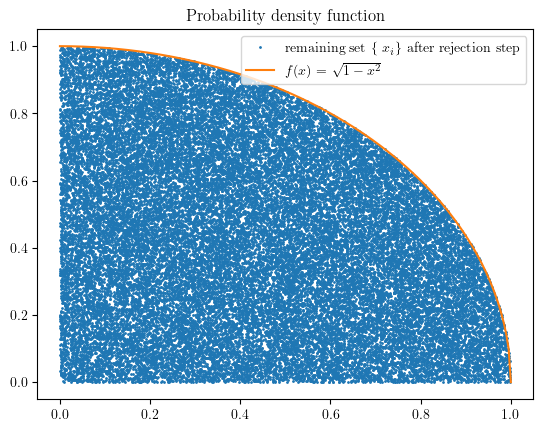

In [393]:
pi_pdf(50000)

5843.150496147214


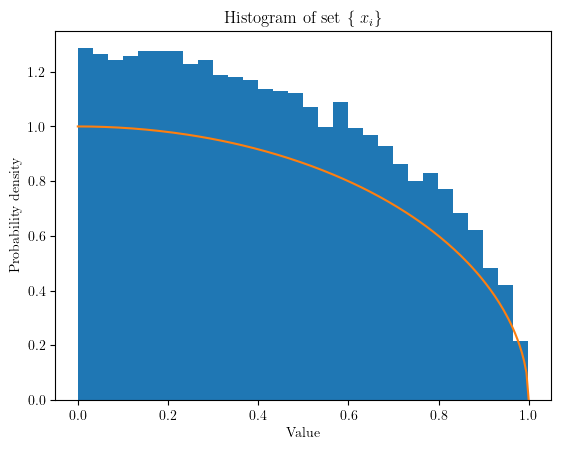

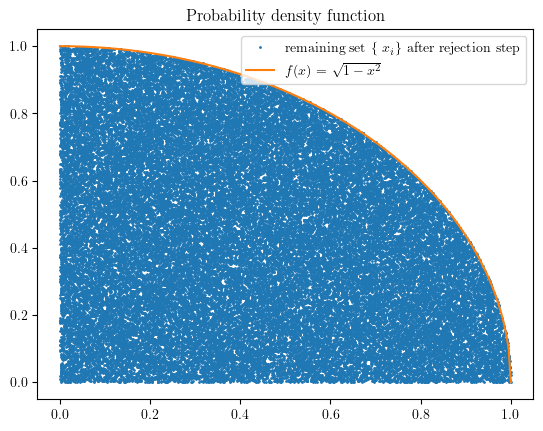

In [394]:
pi_pdf(70000)

7459.518873601933


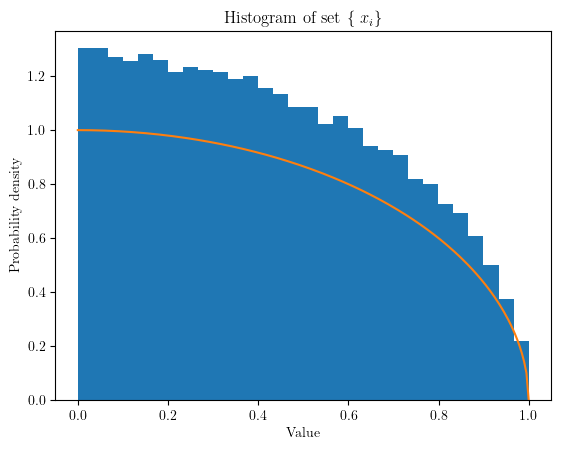

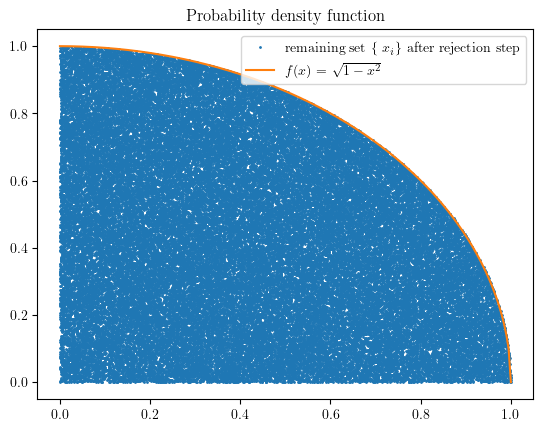

In [395]:
pi_pdf(90000)

In [367]:
pi_pdf(900000)

KeyboardInterrupt: 